In [40]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
filepath = "C:/Users/Bin/Documents/dataset1010/dataset/dataset1010"
data = pd.read_csv(filepath,header=None,usecols=range(1,10,1))
dataset = data.values  # convert dataframe to np.ndarray

#Scaling
scaler = MinMaxScaler()
scaler.fit(dataset)
s_dataset = scaler.transform(dataset)

# split into train and test sets
train_size = int(len(s_dataset) * 0.67)
test_size = len(s_dataset) - train_size
train, test = s_dataset[0:train_size,:], s_dataset[train_size:len(s_dataset),:]
# train.shape == (13424,9)
# test.shape == (6612,9)



In [56]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 3  
# this is our input placeholder
input_vec = Input(shape=(9,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_vec)

encoder = Model(input_vec, encoded)
decoded = Dense(9, activation='sigmoid')(encoded)


In [57]:
# this model maps an input to its reconstruction
autoencoder = Model(input_vec, decoded)

In [58]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [59]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [60]:
history = autoencoder.fit(train, train,
                epochs=100,
                batch_size=100,
                validation_data=(test, test))

Train on 13424 samples, validate on 6612 samples
Epoch 1/100
13424/13424 [==============================] - 0s 33us/step - loss: 0.0216 - val_loss: 0.0147
Epoch 2/100
13424/13424 [==============================] - 0s 12us/step - loss: 0.0106 - val_loss: 0.0051
Epoch 3/100
13424/13424 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0013
Epoch 4/100
13424/13424 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 5.5896e-04
Epoch 5/100
13424/13424 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 3.4218e-04
Epoch 6/100
13424/13424 [==============================] - 0s 14us/step - loss: 0.0018 - val_loss: 2.8755e-04
Epoch 7/100
13424/13424 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 2.7448e-04
Epoch 8/100
13424/13424 [==============================] - 0s 14us/step - loss: 0.0017 - val_loss: 2.7502e-04
Epoch 9/100
13424/13424 [==============================] - 0s 13us/step - loss: 0.0

13424/13424 [==============================] - 0s 14us/step - loss: 6.4728e-04 - val_loss: 2.1361e-04
Epoch 74/100
13424/13424 [==============================] - 0s 13us/step - loss: 6.4142e-04 - val_loss: 2.1349e-04
Epoch 75/100
13424/13424 [==============================] - 0s 13us/step - loss: 6.3570e-04 - val_loss: 2.1183e-04
Epoch 76/100
13424/13424 [==============================] - 0s 17us/step - loss: 6.3013e-04 - val_loss: 2.1101e-04
Epoch 77/100
13424/13424 [==============================] - 0s 14us/step - loss: 6.2468e-04 - val_loss: 2.1042e-04
Epoch 78/100
13424/13424 [==============================] - 0s 13us/step - loss: 6.1931e-04 - val_loss: 2.0984e-04
Epoch 79/100
13424/13424 [==============================] - 0s 13us/step - loss: 6.1402e-04 - val_loss: 2.0981e-04
Epoch 80/100
13424/13424 [==============================] - 0s 14us/step - loss: 6.0888e-04 - val_loss: 2.0820e-04
Epoch 81/100
13424/13424 [==============================] - 0s 13us/step - loss: 6.0386e-04 -

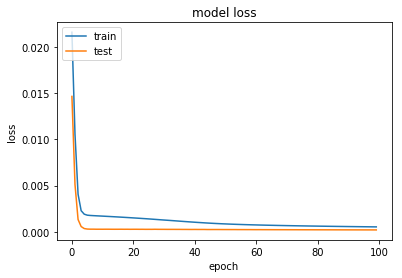

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
encodedData = encoder.predict(test)

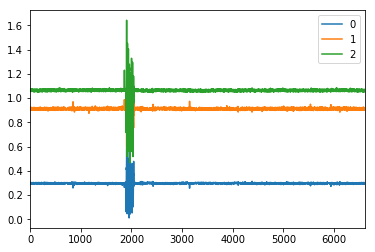

In [63]:
# encoded data
pd.DataFrame(encodedData).plot()

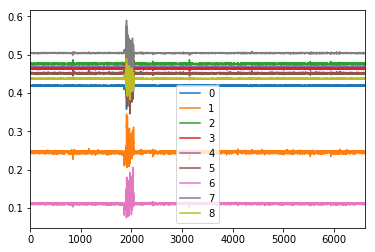

In [64]:
# decoded data 
restore = decoder.predict(encodedData)
pd.DataFrame(restore).plot()

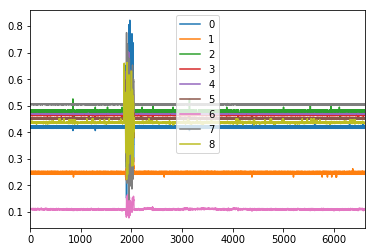

In [65]:
#Original data
pd.DataFrame(test).plot()